<a href="https://colab.research.google.com/github/Shirui-peng/SURD/blob/main/examples/E01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import surd as surd
np.random.seed(10)

# Configure matplotlib to use LaTeX for text rendering and set font size
# plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 18})

In [2]:
def create_pfm( s, a, dt, bins ):
    '''compute the joint PMF of variables

        pfm = create_pfm( s, a, dt )
    Parameters
        s:      [np.ndarray]
            temporal evolution of target variable [size (Nt,)]
        a:      [ tuple ]
            each element must be an np.ndarray of size (Nt,)
            with the temporal evolution of agent variables
        dt:     [int]
            time lag in number of time steps
        bins:     [int]
            number of bins (states) per dimension
    Returns
        pfm     [np.ndarray]
            Mass probability function ( size ( bins, ..., bins ), dim = 1 + len(a) )

    '''
    V = np.vstack([ s[dt:], [ a[i][:-dt] for i in range(len(a)) ] ]).T

    # Histogram computes the bins by equally splitting the interval max(var)-min(var)
    h, _ = np.histogramdd( V, bins=bins )
    return h/h.sum()

In [3]:
N = int( 1e7 )
dt = 1
nbins = 2

q1 = np.random.rand( N ).round().astype(int)
q2 = np.random.rand( N ).round().astype(int)

    Redundant (R):
        (1, 2)      : 1.0000
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.0000
    Information Leak:  0.00%


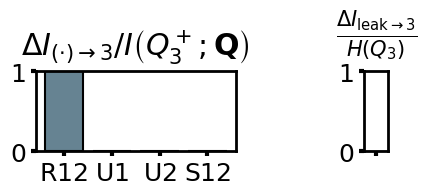

In [4]:
# Example 1: Duplicated input
target = np.roll( q1, dt)
agents = ( q1, q1 )
nvars = 2

hist = create_pfm(target, agents, dt, nbins)
Rd, Sy, MI, info_leak = surd.surd( hist )
surd.nice_print(Rd, Sy, MI, info_leak)

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(9, 2.3), gridspec_kw={'width_ratios': [50, 1]})
surd.plot(Rd, Sy, info_leak, axs, nvars, threshold=-0.01)
axs[0].set_title(f'${{\\Delta I}}_{{(\\cdot) \\rightarrow {3}}} / I \\left(Q_{3}^+ ; \\mathrm{{\\mathbf{{Q}}}} \\right)$', pad=12)
axs[1].set_title(f'$\\frac{{{{\\Delta I}}_{{\\mathrm{{leak}} \\rightarrow {3}}}}}{{H \\left(Q_{3} \\right)}}$', pad=20)
plt.tight_layout(w_pad=-13, h_pad=0)
plt.show()

    Redundant (R):
        (1, 2)      : 0.0000
    Unique (U):
        (1,)        : 1.0000
        (2,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.0000
    Information Leak:  0.00%


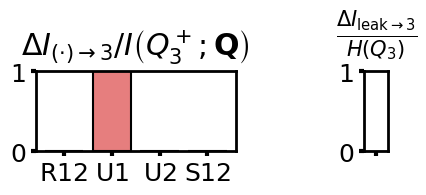

In [5]:
# Example 2: Duplicated input
target = np.roll( q1, dt)
agents = ( q1, q2 )
nvars = 2

# Prepare Subplots
hist = create_pfm(target, agents, dt, nbins)
Rd, Sy, MI, info_leak = surd.surd( hist )
surd.nice_print(Rd, Sy, MI, info_leak)

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(9, 2.3), gridspec_kw={'width_ratios': [50, 1]})
surd.plot(Rd, Sy, info_leak, axs, nvars, threshold=-0.01)
axs[0].set_title(f'${{\\Delta I}}_{{(\\cdot) \\rightarrow {3}}} / I \\left(Q_{3}^+ ; \\mathrm{{\\mathbf{{Q}}}} \\right)$', pad=12)
axs[1].set_title(f'$\\frac{{{{\\Delta I}}_{{\\mathrm{{leak}} \\rightarrow {3}}}}}{{H \\left(Q_{3} \\right)}}$', pad=20)
plt.tight_layout(w_pad=-13, h_pad=0)
plt.show()

    Redundant (R):
        (1, 2)      : 0.0000
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 1.0000
    Information Leak:  0.00%


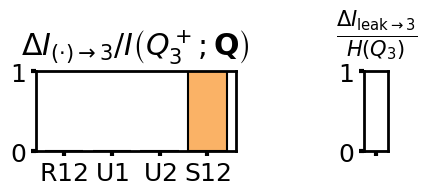

In [6]:
# Example 3: Exclusive XOR
target = np.roll( q1 ^ q2, dt)
agents = ( q1, q2 )

# Prepare Subplots
hist = create_pfm(target, agents, dt, nbins+1 )
Rd, Sy, MI, info_leak = surd.surd( hist )
surd.nice_print(Rd, Sy, MI, info_leak)

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(9, 2.3), gridspec_kw={'width_ratios': [50, 1]})
surd.plot(Rd, Sy, info_leak, axs, nvars, threshold=-0.01)
axs[0].set_title(f'${{\\Delta I}}_{{(\\cdot) \\rightarrow {3}}} / I \\left(Q_{3}^+ ; \\mathrm{{\\mathbf{{Q}}}} \\right)$', pad=12)
axs[1].set_title(f'$\\frac{{{{\\Delta I}}_{{\\mathrm{{leak}} \\rightarrow {3}}}}}{{H \\left(Q_{3} \\right)}}$', pad=20)
plt.tight_layout(w_pad=-13, h_pad=0)
plt.show()